In [17]:
from utils.file_handling import *
from utils.misc import *
from utils.matplot_handlers import *
from utils.visualizers import *
from segmentation.composite_action_extractor import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Entropy Parameters
# csv_file_name = 'Cartpole'
# csv_file_name = 'Mountaincar'
csv_file_name = 'Pendulum'
# csv_file_name = 'Acrobot'
episodes = 2
analysis_method = 'w'

# Read in entropy csv
base_path = get_absolute_path('data', directory_file_hint=csv_file_name.lower(), ignore_files=False)
csv_path = os.path.join(base_path, 'state_action_data.csv')

pre_data = pd.read_csv(csv_path, index_col=None)
selected_episodes = pre_data['episode'].unique()  # Either do [some index] or [:]
selected_episodes = [selected_episodes] if np.isscalar(selected_episodes) else selected_episodes
data_df = pre_data[pre_data['episode'].isin(selected_episodes)]
data_df_episodes = [data_df[data_df['episode'] == episode].copy() for episode in selected_episodes]

In [18]:
selected_episodes

array([  4,   5,  12,  15,  16,  24,  28,  32,  87, 450])

In [19]:
main_df = data_df_episodes[episodes]

In [20]:
main_df

,index,step,action_values_0,state_values,episode
400,0,0,-0.352989,"[0.7705306100906242, 0.6374029956890465, 0.792...",12
401,1,1,0.610038,"[0.7253704166186193, 0.6883587427312379, 1.362...",12
402,2,2,0.794457,"[0.6531217761747726, 0.7572528940098613, 1.997...",12
403,3,3,0.976789,"[0.5447609544481, 0.8385913799394763, 2.711912...",12
404,4,4,0.939028,"[0.391276737782035, 0.9202730651663389, 3.4817...",12
...,...,...,...,...,...
595,195,195,-0.584061,"[0.9949004533977591, 0.100861726283726, 0.2185...",12
596,196,196,-0.831863,"[0.9940105883340091, 0.10928380611910038, 0.16...",12
597,197,197,-0.873367,"[0.9933350523953446, 0.11526262916807822, 0.12...",12
598,198,198,-0.741837,"[0.9927732978980228, 0.12000491231896976, 0.09...",12


In [21]:
with open(os.path.join(base_path, 'video.pkl'), 'rb') as f:
    video_path = pickle.load(f)
video = video_path[selected_episodes[episodes]][0]

In [22]:
composite_actions, info = CompositeActionExtractor.get_composite_actions(dataframe=main_df, analysis_method=analysis_method, 
                                                            window_size=5)

Text(0.5, 1.0, 'Action Values for Pendulum')

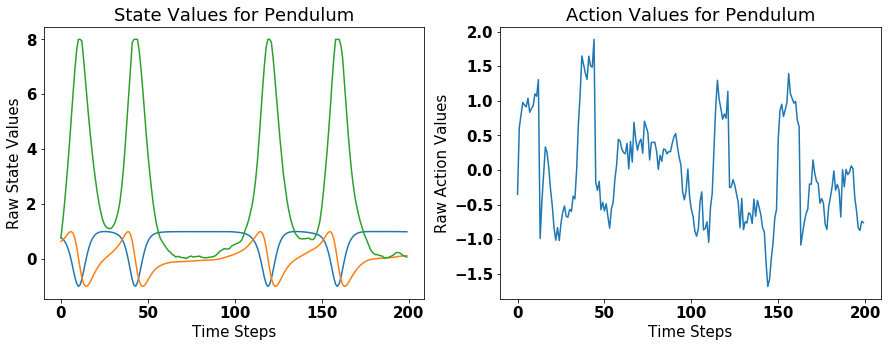

In [23]:
matplotlib.rcParams['figure.figsize'] = [15, 5]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)


plt.subplot(121)
plt.plot(info['state'])
plt.ylabel('Raw State Values')
plt.xlabel('Time Steps')
plt.title(f'State Values for {csv_file_name}')
plt.subplot(122)
plt.plot(info['actions'])
plt.ylabel('Raw Action Values')
plt.xlabel('Time Steps')
plt.title(f'Action Values for {csv_file_name}')

Text(0.5, 1.0, 'Action Measurements for Pendulum EM')

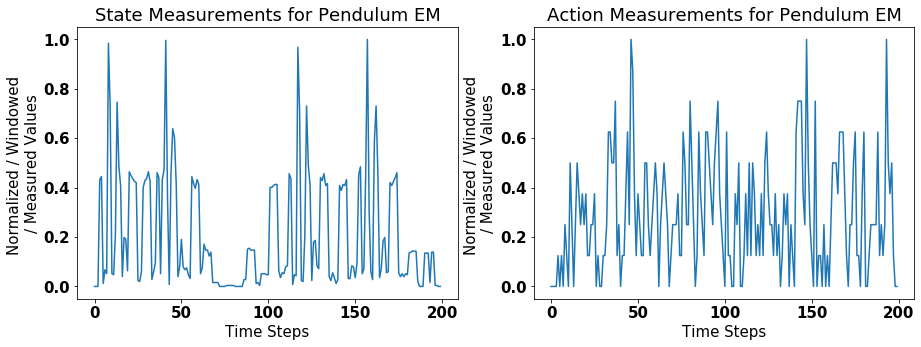

In [24]:
matplotlib.rcParams['figure.figsize'] = [15, 5]
plt.subplot(121)
plt.plot(info['state_analyzed_norm'])
plt.ylabel('Normalized / Windowed \n/ Measured Values')
plt.xlabel('Time Steps')
plt.title(f'State Measurements for {csv_file_name} EM')#using {analysis_method}')
plt.subplot(122)
plt.plot(info['action_analyzed_norm'])
plt.ylabel('Normalized / Windowed \n/ Measured Values')
plt.xlabel('Time Steps')
plt.title(f'Action Measurements for {csv_file_name} EM')#using {analysis_method}')

Text(0.5, 1.0, 'Action Threshed Measurements for \nPendulum using w')

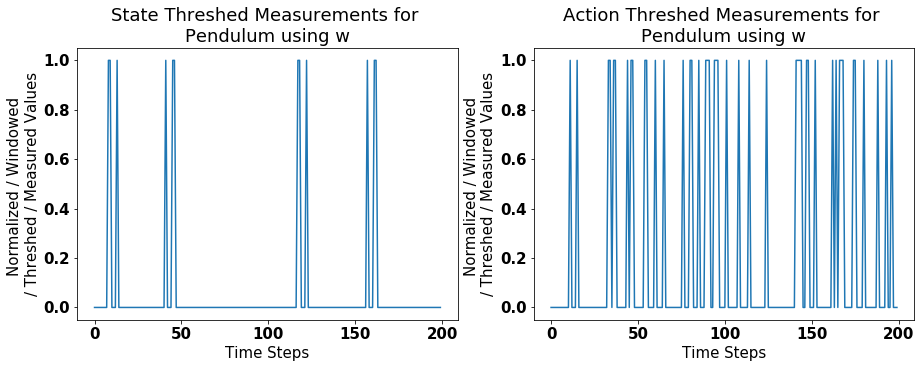

In [25]:
matplotlib.rcParams['figure.figsize'] = [15, 5]
plt.subplot(121)
plt.plot(info['state_analyzed_binary'])
plt.ylabel('Normalized / Windowed \n/ Threshed / Measured Values')
plt.xlabel('Time Steps')
plt.title(f'State Threshed Measurements for \n{csv_file_name} using {analysis_method}')
plt.subplot(122)
plt.plot(info['action_analyzed_binary'])
plt.ylabel('Normalized / Windowed \n/ Threshed / Measured Values')
plt.xlabel('Time Steps')
plt.title(f'Action Threshed Measurements for \n{csv_file_name} using {analysis_method}')

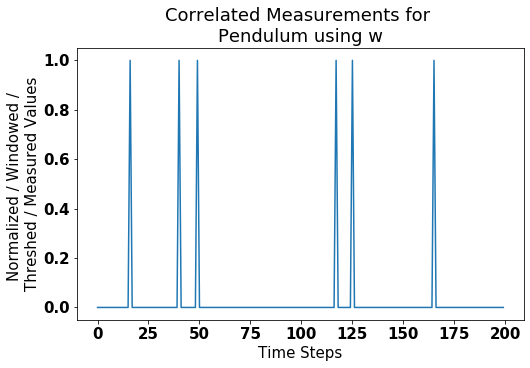

In [26]:
matplotlib.rcParams['figure.figsize'] = [8, 5]
for key in info['index_groups']:
    plt.subplot(1,len(info['index_groups']),1)
    plt.plot(info['index_groups'][key])
    plt.ylabel('Normalized / Windowed / \nThreshed / Measured Values')
    plt.xlabel('Time Steps')
    plt.title(f'Correlated Measurements for \n{csv_file_name} using {analysis_method}')

Text(0.5, 0, 'Time Steps')

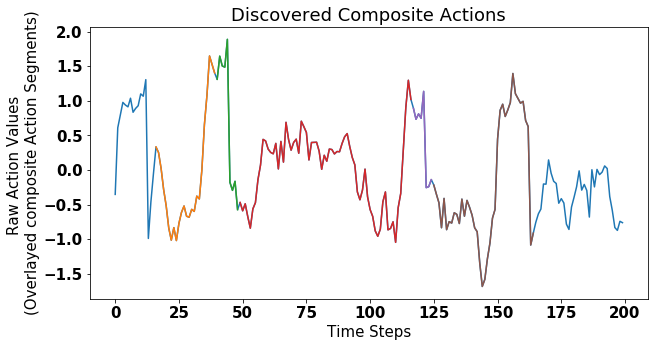

In [27]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
plt.plot(info['actions'])
for action in composite_actions:
    for i, segment in enumerate(composite_actions[action]):
        plt.plot(segment, label=f'composite Action {action} segment #{i}')

plt.title('Discovered Composite Actions')
plt.ylabel('Raw Action Values \n(Overlayed composite Action Segments)')
plt.xlabel('Time Steps')
# plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")

In [28]:
from ipywidgets import FloatSlider, IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual

def f(i):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,2,1)
    plt.imshow(video[i])
    plt.subplot(1,2,2)
    plt.subplots_adjust(right=1.5)
    plt.plot(info['index_groups'][0], markevery=[i], marker='|', markeredgecolor='r', 
             markersize=40, mew=4)
    plt.ylabel('Normalized / Windowed / \nThreshed / Measured Values')
    plt.xlabel('Time Steps')
    plt.title(f'Correlated Action Joint 0 Measurements for \n{csv_file_name} using {analysis_method}')
    

interact(f,i=IntSlider(min=0, max=video.shape[0]-1, step=1));

interactive(children=(IntSlider(value=0, description='i', max=199), Output()), _dom_classes=('widget-interact'…

In [29]:
## We can take a look at primarily the action with the maximum total entropy
scored_composite_actions = {key: [(seg, info['state_analyzed_norm'][~np.isnan(seg)].max()) for seg in composite_actions[key]] for key in composite_actions}
k = 1
for key in scored_composite_actions:
    scored_composite_actions[key] = list(sorted(scored_composite_actions[key], key=lambda x: x[1], reverse=True))[:k]

In [30]:
isolated_composite_actions = {key: [seg[~np.isnan(seg)] for seg in composite_actions[key]] for key in composite_actions}

In [112]:
import cv2
# define a function which returns an image as numpy array from figure
def get_img_from_fig(fig, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", bbox_inches="tight")
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     fig.canvas.draw()
#     image = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
#     image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return img

In [110]:
from ipywidgets import FloatSlider, IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
from copy import copy

matplotlib.rcParams["figure.facecolor"] = 'white'

def f(i, do_return=False):
    fig = plt.figure(figsize=(9, 5))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,2,1)
    plt.imshow(video[i])
    plt.subplot(1,2,2)
    plt.subplots_adjust(right=1.5)
    plt.plot(info['index_groups'][0], markevery=[i], marker='|', markeredgecolor='r', 
         markersize=40, mew=4)
    plt.plot(scored_composite_actions[0][0][0])
    plt.ylabel('Normalized / Windowed / \nThreshed / Measured Values')
    plt.xlabel('Time Steps')
    plt.title(f'Highest Effective Correlated Action Joint 0 Measurements for \n{csv_file_name} using {analysis_method}')
    if do_return: 
        im = get_img_from_fig(fig)
#         plt.close()
        return im
    
interact(f,i=IntSlider(min=0, max=video.shape[0]-1, step=1));

interactive(children=(IntSlider(value=0, description='i', max=199), Checkbox(value=False, description='do_retu…

In [32]:
import pickle

name = os.path.join(base_path, 'segments')
if name[-4:] != ".pkl":
    name += ".pkl"
with open(name, 'wb') as f:
    pickle.dump(isolated_composite_actions, f, pickle.HIGHEST_PROTOCOL)